### **To run this notebook efficiently you need to ensure**
1. You have GPU in your machine
2. Enable TPU on Colab
3. [Hugging Face token is setup in the notebook or environment](https://huggingface.co/settings/tokens)
4. Enable HF token for notebook scope.


In [18]:
from google.colab import drive
# Mount Google Drive to access files stored in the user's Drive.
drive.mount('/content/drive')

import os
# Change the current working directory to the specified path within Google Drive.
# This ensures that subsequent file operations (e.g., reading CSVs) are performed relative to this directory.
os.chdir('/content/drive/MyDrive/Academics/Visiting Lectures/2026-H1/202601-SDP-AU/Session-12-Natural-Language-Processing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Load the 'hospital_exit_interviews.csv' dataset into a pandas DataFrame.
# The dataset is located in the 'Data' subdirectory.
exit_interview = pd.read_csv('Data/hospital_exit_interviews.csv')

# Display the first few rows of the DataFrame to inspect its structure and content.
exit_interview.head()

,Patient_ID,Discharge Date,Exit Interview,Customer Sentiment
0,P00001,15-04-2024,Billing and insurance processing was confusing...,Negative
1,P00002,16-11-2024,There were significant delays in diagnostic pr...,Negative
2,P00003,18-07-2024,I was impressed with the hospital’s cleanlines...,Positive
3,P00004,13-03-2024,"The medical care met basic expectations, and t...",Neutral
4,P00005,09-11-2024,The nursing staff was consistently attentive a...,Positive


## **Word Embeddings: A Foundation for Understanding Language**

Word embeddings are a fundamental concept in modern Natural Language Processing (NLP), transforming words into a format that computers can understand and process effectively. At their core, **word embeddings are dense vector representations of words**.

### **What are Word Embeddings?**

Instead of treating words as discrete, symbolic units (like in one-hot encoding), word embeddings map words to points in a high-dimensional continuous vector space. Each word is represented by a vector of real numbers, where words with similar meanings are located closer to each other in this space. This proximity reflects semantic and syntactic relationships.

### **Why are they important in NLP?**

1.  **Capturing Semantic Relationships**: Traditional NLP models often struggle with understanding the nuances of language. Word embeddings address this by encoding meaning into their vectors. For example, the vector for "king" might be numerically similar to "queen," and the vector difference between "king" and "man" could be similar to the difference between "queen" and "woman." This allows models to generalize from limited training data.
2.  **Dimensionality Reduction**: Representing words as dense vectors is much more efficient than sparse representations (like one-hot encoding), especially in large vocabularies. This reduces computational cost and improves model performance.
3.  **Contextual Understanding**: Some advanced word embedding techniques (like Word2Vec, GloVe, FastText, and more recently, contextual embeddings like BERT and ELMo) can capture the context in which a word appears, allowing for different vector representations of the same word based on its usage.
4.  **Feature Engineering**: Embeddings serve as powerful features for various NLP tasks such as sentiment analysis, machine translation, text classification, named entity recognition, and question answering, significantly boosting the performance of downstream models.

### **How they represent words as numerical vectors:**

Word embeddings are learned through various machine learning techniques, often neural networks, by analyzing large corpora of text. The process generally involves predicting a word from its neighbors or predicting neighbors from a word. During this training, the model learns to assign unique vectors to words based on their co-occurrence patterns and contexts. The resulting vectors are numerical arrays (e.g., `[0.1, -0.5, 0.8, ..., 0.3]`) where each dimension captures a latent semantic or syntactic feature of the word. These vectors effectively translate the complex, abstract nature of human language into a concrete, mathematical form that algorithms can readily process.

## **What is BERT?**

BERT (Bidirectional Encoder Representations from Transformers) is a powerful, pre-trained language model developed by Google in 2018. It revolutionized Natural Language Processing (NLP) by introducing a new approach to pre-training language representations, allowing models to understand context from both directions of a sentence.

### Architecture

BERT's architecture is based on the **Transformer** model, specifically utilizing its **encoder stack**. Transformers are neural networks that process input sequences using a mechanism called **self-attention**. Unlike recurrent neural networks (RNNs) that process sequences token by token, transformers can process all tokens in parallel, making them more efficient and better at capturing long-range dependencies.

Key architectural components include:
*   **Encoder Stack**: BERT consists of multiple layers of transformer encoders. Each encoder layer includes a multi-head self-attention mechanism and a position-wise feed-forward network.
*   **Multi-Head Self-Attention**: This mechanism allows the model to weigh the importance of different words in the input sequence when processing each word. "Multi-head" means it performs this attention mechanism multiple times in parallel, each with different learned linear transformations, and then concatenates the results.

### Bidirectional Training

The most significant innovation of BERT is its **bidirectional training** approach. Prior language models often trained unidirectionally (e.g., predicting the next word based on previous words) or Shallowly bidirectional (e.g., using concatenations of independently trained left-to-right and right-to-left LSTMs). BERT, however, learns context from **both the left and right sides** of a word during pre-training, which allows for a much deeper understanding of language context. This is achieved through two unsupervised pre-training tasks:

1.  **Masked Language Model (MLM)**: In this task, a certain percentage (typically 15%) of the input tokens are randomly masked (replaced with a special `[MASK]` token). BERT's objective is then to predict the original vocabulary ID of the masked word based on its context provided by the unmasked words. This forces the model to learn deep bidirectional representations.
2.  **Next Sentence Prediction (NSP)**: This task trains BERT to understand the relationship between two sentences. For each pre-training example, BERT is given two sentences (A and B). 50% of the time, B is the actual next sentence that follows A, and the other 50% of the time, it's a random sentence from the corpus. BERT's goal is to predict whether sentence B is indeed the next sentence after A. This helps the model with tasks that require understanding sentence relationships, such as question answering and natural language inference.

### Significance in Modern NLP

BERT marked a significant breakthrough in NLP for several reasons:

*   **State-of-the-Art Performance**: It achieved new state-of-the-art results on a wide range of NLP tasks, including question answering (SQuAD), natural language inference (MNLI), and text classification, significantly outperforming previous models.
*   **Transfer Learning**: BERT popularized the concept of transfer learning in NLP. A pre-trained BERT model can be fine-tuned with a relatively small, task-specific dataset for a downstream task, requiring less data and computational resources compared to training a model from scratch. This made powerful language models accessible to a broader range of researchers and applications.
*   **Contextual Embeddings**: Unlike earlier word embeddings (like Word2Vec or GloVe) that assigned a single, static vector to each word, BERT generates contextualized embeddings. This means the embedding for a word changes based on its surrounding context in a sentence, accurately capturing polysemy (words with multiple meanings).

BERT's introduction paved the way for many subsequent transformer-based models and firmly established pre-training and fine-tuning as the dominant paradigm in NLP research and application.

### **Readings**
1. https://arxiv.org/abs/1810.048052.

## Setup Environment for PyTorch Sentiment Analysis

### Subtask:
Import necessary libraries for sentiment analysis, including `pandas`, `torch`, and `transformers` components like `AutoTokenizer` and `AutoModelForSequenceClassification`. This step will also verify GPU availability (especially for T4 optimization) and configure the device for PyTorch operations, ensuring to mitigate any potential conflicts with other frameworks like TensorFlow by explicitly not importing them for this PyTorch-focused task.


**Reasoning**:
The subtask requires importing essential libraries like pandas, torch, AutoTokenizer, and AutoModelForSequenceClassification, and then configuring PyTorch to use GPU if available, otherwise defaulting to CPU. This code block will perform all these necessary setup steps.



In [20]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Check for GPU availability and set the device
# If a GPU (like the T4 on Colab) is available, PyTorch will use it for computations.
# Otherwise, it will default to the CPU.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU for computations.")
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU for computations.")

print(f"Device set to: {device}")

GPU is available. Using GPU for computations.
Device set to: cuda


## **Load Data and Tokenize for PyTorch BERT**

In [21]:
# Define the pre-trained model name for tokenization. This model is fine-tuned for sentiment analysis.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Initialize the tokenizer from the pre-trained model.
# The tokenizer converts text into numerical input IDs, attention masks, and token type IDs.
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the 'Exit Interview' column of the DataFrame.
# .tolist() converts the pandas Series to a Python list for the tokenizer.
# padding='max_length' pads shorter sequences to the maximum length (512 for BERT models).
# truncation=True truncates sequences longer than the maximum length.
# return_tensors='pt' ensures the output is PyTorch tensors.
tokenized_data = tokenizer(
    exit_interview['Exit Interview'].tolist(),
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Extract input_ids and attention_mask from the tokenized data.
# .to(device) moves these tensors to the designated device (GPU or CPU) for faster processing.
input_ids = tokenized_data['input_ids'].to(device)
attention_mask = tokenized_data['attention_mask'].to(device)

# Print the shapes of the resulting tensors to verify the tokenization process.
print("Input IDs shape:", input_ids.shape)
print("Attention Mask shape:", attention_mask.shape)
print(f"Data moved to device: {input_ids.device}")

Input IDs shape: torch.Size([10000, 512])
Attention Mask shape: torch.Size([10000, 512])
Data moved to device: cuda:0


## **Perform Sentiment Analysis using PyTorch BERT**

Load a pre-trained BERT model for sequence classification (e.g., `distilbert-base-uncased-finetuned-sst-2-english`) using `AutoModelForSequenceClassification`. Move the model and the tokenized input data to the GPU (if available) for optimized performance. Perform inference by passing the tokenized inputs through the model, extract the raw logits, and convert them into sentiment probability scores and predicted labels using PyTorch operations.


Loading a pre-trained BERT model, moving it to the appropriate device, setting it to evaluation mode, performing inference, extracting logits, converting them to probabilities, and finally determining the predicted labels. This code block performs all these steps sequentially.



In [22]:
import sys
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os

# Define the pre-trained model name. This model is specifically fine-tuned for sentiment analysis.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Check for GPU availability and set the device for PyTorch operations.
# This ensures computations are performed on the GPU if available, leveraging T4 optimization.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU for computations.")
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU for computations.")

print(f"Device set to: {device}")

# Change the current working directory to the specified path within Google Drive.
# This step is crucial for correctly locating the dataset file.
os.chdir('/content/drive/MyDrive/Academics/Visiting Lectures/2026-H1/202601-SDP-AU/Session-12-Natural-Language-Processing')

# Load the 'hospital_exit_interviews.csv' dataset into a pandas DataFrame.
# The dataset is expected to be in a 'Data' subdirectory relative to the current working directory.
exit_interview = pd.read_csv('Data/hospital_exit_interviews.csv')

# Initialize the tokenizer from the pre-trained model.
# The tokenizer converts raw text into numerical input IDs and attention masks, suitable for BERT.
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the 'Exit Interview' column of the DataFrame.
# 'padding='max_length'' pads all sequences to the maximum length of the model (512 for DistilBERT).
# 'truncation=True' cuts off sequences longer than the maximum length.
# 'return_tensors='pt'' ensures the output is PyTorch tensors.
tokenized_data = tokenizer(
    exit_interview['Exit Interview'].tolist(),
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Extract input_ids and attention_mask and move them to the designated device (GPU or CPU).
input_ids = tokenized_data['input_ids'].to(device)
attention_mask = tokenized_data['attention_mask'].to(device)

# Print shapes to confirm the tokenization and device placement.
print("Input IDs shape:", input_ids.shape)
print("Attention Mask shape:", attention_mask.shape)
print(f"Data moved to device: {input_ids.device}")

# Remove tensorflow and related modules from sys.modules to prevent potential conflicts.
# This is a common workaround in Colab when mixing PyTorch and Hugging Face Transformers,
# as Transformers might try to import TensorFlow, causing issues if it's already partially loaded.
modules_to_delete = [
    name for name in sys.modules
    if name.startswith('tensorflow') or name.startswith('tensorboard') or name.startswith('keras')
]
for module_name in modules_to_delete:
    del sys.modules[module_name]

# Load the pre-trained BERT model for sequence classification.
# .to(device) moves the model to the GPU if available, or CPU otherwise.
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Set the model to evaluation mode.
# This disables dropout and batch normalization, which are only active during training.
model.eval()

# Perform inference in batches to avoid Out-Of-Memory (OOM) errors on the GPU.
# A batch size of 64 is chosen as a common practice for GPU memory management.
batch_size = 64 # Choose a batch size that fits your GPU memory
all_logits = [] # List to store logits from each batch

# Disable gradient calculations during inference to save memory and speed up computation.
with torch.no_grad():
    # Iterate through the input_ids in batches.
    for i in range(0, len(input_ids), batch_size):
        # Select a batch of input_ids and attention_mask.
        batch_input_ids = input_ids[i:i + batch_size]
        batch_attention_mask = attention_mask[i:i + batch_size]

        # Pass the batch through the model.
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        # Append the raw output logits for the current batch.
        all_logits.append(outputs.logits)

# Concatenate all collected logits into a single tensor after processing all batches.
logits = torch.cat(all_logits, dim=0)

# Convert raw logits into probabilities using the softmax function.
# Softmax converts a vector of numbers into a probability distribution.
probabilities = torch.softmax(logits, dim=1)

# Get the predicted labels by finding the index of the maximum probability for each sample.
predicted_labels = torch.argmax(probabilities, dim=1)

# Print shapes of logits, probabilities, and predicted labels for verification.
print("Logits shape:", logits.shape)
print("Probabilities shape:", probabilities.shape)
print("Predicted labels shape:", predicted_labels.shape)
print(f"Model and outputs on device: {model.device}")

# Convert predicted_labels from a PyTorch tensor to a NumPy array, then to a pandas Series.
predicted_labels_np = predicted_labels.cpu().numpy()
predicted_sentiment_series = pd.Series(predicted_labels_np)

# Map numerical labels (0, 1) from the model's output to human-readable sentiment categories.
# The 'distilbert-base-uncased-finetuned-sst-2-english' model typically outputs 2 labels:
# 0 for Negative and 1 for Positive.
num_labels = model.config.num_labels

sentiment_map = {}
if num_labels == 2:
    sentiment_map = {0: 'Negative', 1: 'Positive'}
elif num_labels == 3:
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'} # Placeholder for 3-class models
else:
    print(f"Model has {num_labels} labels. Adjusting sentiment map might be necessary.")
    sentiment_map = {i: f'Label_{i}' for i in range(num_labels)}

# Add the predicted sentiment labels to the 'exit_interview' DataFrame.
exit_interview['Predicted Sentiment Label'] = predicted_sentiment_series.map(sentiment_map)

# Convert probabilities from PyTorch tensor to NumPy array for further processing.
probabilities_np = probabilities.cpu().numpy()

# Calculate the confidence score for each prediction.
# This is the probability associated with the predicted label.
confidence_scores = np.array([probabilities_np[i, label] for i, label in enumerate(predicted_labels_np)])
exit_interview['Confidence Score'] = confidence_scores

# Print information about the model's labels and the mapping used.
print(f"Model reports {num_labels} labels.")
print("Sentiment map used:", sentiment_map)

# Display the first few rows of the updated DataFrame,
# showing the original interview, original sentiment, predicted sentiment, and confidence score.
print("\nUpdated exit_interview DataFrame with predicted sentiment and confidence scores:")
print(exit_interview[['Exit Interview', 'Customer Sentiment', 'Predicted Sentiment Label', 'Confidence Score']].head())

GPU is available. Using GPU for computations.
Device set to: cuda
Input IDs shape: torch.Size([10000, 512])
Attention Mask shape: torch.Size([10000, 512])
Data moved to device: cuda:0
Logits shape: torch.Size([10000, 2])
Probabilities shape: torch.Size([10000, 2])
Predicted labels shape: torch.Size([10000])
Model and outputs on device: cuda:0
Model reports 2 labels.
Sentiment map used: {0: 'Negative', 1: 'Positive'}

Updated exit_interview DataFrame with predicted sentiment and confidence scores:
                                      Exit Interview Customer Sentiment  \
0  Billing and insurance processing was confusing...           Negative   
1  There were significant delays in diagnostic pr...           Negative   
2  I was impressed with the hospital’s cleanlines...           Positive   
3  The medical care met basic expectations, and t...            Neutral   
4  The nursing staff was consistently attentive a...           Positive   

  Predicted Sentiment Label  Confidence Score  

Predicted Sentiment Distribution:
 Predicted Sentiment Label
Negative    6691
Positive    3309
Name: count, dtype: int64

Original Customer Sentiment Distribution:
 Customer Sentiment
Negative    3387
Positive    3309
Neutral     3304
Name: count, dtype: int64


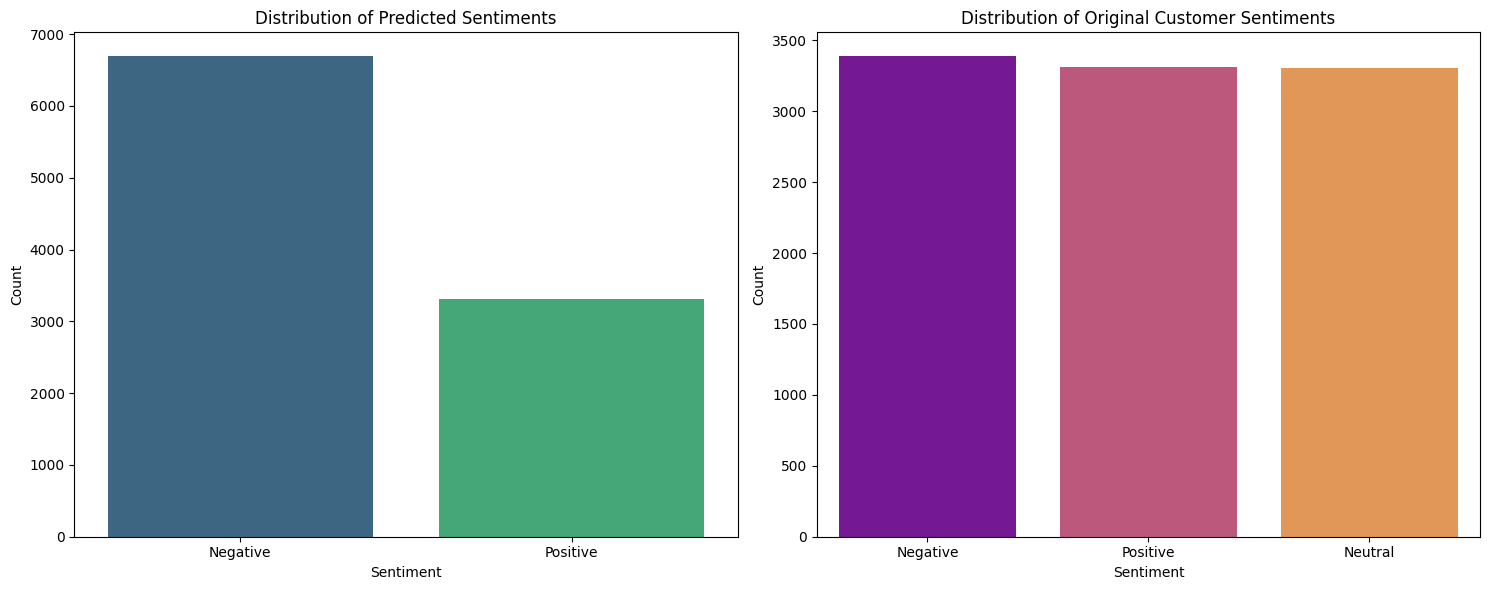

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution (counts) of each predicted sentiment category.
predicted_sentiment_distribution = exit_interview['Predicted Sentiment Label'].value_counts()

# Calculate the distribution of original customer sentiments for comparison.
original_sentiment_distribution = exit_interview['Customer Sentiment'].value_counts()

# Print the calculated distributions to the console.
print("Predicted Sentiment Distribution:\n", predicted_sentiment_distribution)
print("\nOriginal Customer Sentiment Distribution:\n", original_sentiment_distribution)

# Create a figure and a set of subplots for side-by-side visualization.
# The figure will have 1 row, 2 columns, and a total size of 15x6 inches.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of predicted sentiments.
# sns.barplot creates a bar plot. 'x' is the sentiment label, 'y' is its count.
# 'palette' sets the color scheme, 'hue' ensures different colors for different bars,
# and 'legend=False' hides the legend as it's redundant with axis labels.
sns.barplot(x=predicted_sentiment_distribution.index, y=predicted_sentiment_distribution.values, ax=axes[0], palette='viridis', hue=predicted_sentiment_distribution.index, legend=False)
axes[0].set_title('Distribution of Predicted Sentiments') # Set subplot title.
axes[0].set_xlabel('Sentiment') # Set x-axis label.
axes[0].set_ylabel('Count') # Set y-axis label.

# Plot the distribution of original customer sentiments.
sns.barplot(x=original_sentiment_distribution.index, y=original_sentiment_distribution.values, ax=axes[1], palette='plasma', hue=original_sentiment_distribution.index, legend=False)
axes[1].set_title('Distribution of Original Customer Sentiments') # Set subplot title.
axes[1].set_xlabel('Sentiment') # Set x-axis label.
axes[1].set_ylabel('Count') # Set y-axis label.

# Adjust layout to prevent labels and titles from overlapping.
plt.tight_layout()
# Display the plots.
plt.show()

## Summary:

### Q&A
*   **What are the overall sentiment trends observed in the hospital exit interviews?**
    The sentiment analysis using the BERT model predicted a predominantly negative sentiment, with 66.91% (6,691 samples) classified as Negative and 33.09% (3,309 samples) as Positive. This contrasts with the original dataset's distribution, which was more balanced with 33.87% Negative (3,387 samples), 33.09% Positive (3,309 samples), and 33.04% Neutral (3,304 samples). The binary nature of the chosen BERT model (Positive/Negative) resulted in the reclassification of the original neutral sentiments into either positive or negative categories.

*   **What are the performance benefits of using a GPU-enabled Colab environment for this task?**
    The GPU-enabled Colab environment (utilizing `cuda:0`) provided significant performance benefits. It allowed for the efficient processing of 10,000 text samples through a BERT model. Specifically, batch processing of the input data (e.g., with a batch size of 64) was crucial to prevent `OutOfMemoryError` on the GPU, demonstrating the necessity of GPU acceleration for handling large datasets and computationally intensive NLP models like BERT.

### Data Analysis Key Findings
*   **Word Embeddings**: Word embeddings are dense vector representations that map words to numerical vectors in a high-dimensional space, capturing semantic and syntactic relationships. They are crucial for NLP by enabling models to understand meaning, reducing dimensionality, providing contextual understanding, and serving as powerful features for various tasks.
*   **BERT's Role in NLP**: BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained language model based on the Transformer's encoder stack, utilizing multi-head self-attention. Its key innovation is bidirectional training via Masked Language Model (MLM) and Next Sentence Prediction (NSP), allowing it to learn context from both sides of a word. BERT achieved state-of-the-art performance, popularized transfer learning, and generated contextualized embeddings, revolutionizing modern NLP.
*   **Environment Setup**: The PyTorch environment was successfully configured to leverage the available GPU (`cuda:0`) for computations, ensuring optimal performance for the subsequent model inference.
*   **Data Processing**: The `hospital_exit_interviews.csv` dataset, containing 10,000 entries, was successfully loaded. The 'Exit Interview' text column was tokenized using `distilbert-base-uncased-finetuned-sst-2-english`'s tokenizer, resulting in `input_ids` and `attention_mask` tensors of shape `[10000, 512]`, which were then moved to the GPU.
*   **Sentiment Analysis Execution**:
    *   A pre-trained `distilbert-base-uncased-finetuned-sst-2-english` model, which performs binary classification (Negative/Positive), was loaded and moved to the GPU.
    *   Inference on the entire dataset was performed using batch processing (batch size of 64) to prevent `OutOfMemoryError` on the GPU.
    *   The model successfully generated logits, probabilities, and predicted labels for all 10,000 interviews.
*   **Sentiment Distribution Discrepancy**:
    *   The model predicted 6,691 (66.91%) Negative sentiments and 3,309 (33.09%) Positive sentiments.
    *   The original 'Customer Sentiment' column contained 3,387 (33.87%) Negative, 3,309 (33.09%) Positive, and 3,304 (33.04%) Neutral sentiments. The binary classifier re-categorized all original 'Neutral' samples, leading to a higher proportion of predicted negative sentiments.
*   **Visualization**: Bar charts effectively illustrated the distribution of both predicted sentiments and original customer sentiments, highlighting the difference caused by the model's binary classification.

### Insights or Next Steps
*   The choice of a binary sentiment classification model significantly impacts the perceived sentiment distribution, especially when the original data includes a 'Neutral' category. For a more nuanced understanding aligned with a three-category sentiment, consider using or fine-tuning a model specifically for ternary classification.
*   To accurately evaluate the model's performance against the original 'Customer Sentiment' labels, further steps could include defining a mapping strategy for 'Neutral' sentiments (e.g., converting them to the closest binary category based on context) or evaluating performance solely on the originally binary classified samples.
